Decision Tree
1. notebooks: 
   - [using scikit](https://www.kaggle.com/code/arpikr/decision-tree-regression-model)
2. Readings:
   - [Medium Article - LLM aided.](https://farshadabdulazeez.medium.com/understanding-decision-tree-regressor-an-in-depth-intuition-a1d3af182efd)
   - [Visual guided article](https://medium.com/data-science/decision-tree-regressor-explained-a-visual-guide-with-code-examples-fbd2836c3bef)
3. StatQuest:
   - [reg tree](https://youtu.be/g9c66TUylZ4?si=sbVPZbFJnpumIxIL)

## kaggle's notebook

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

In [11]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Admission%20Chance.csv')
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Medium Article

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast', 'sunny', 'sunny', 'rain', 'sunny', 'overcast', 'overcast', 'rain', 'sunny', 'overcast', 'rain', 'sunny', 'sunny', 'rain', 'overcast', 'rain', 'sunny', 'overcast', 'sunny', 'overcast', 'rain', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Num_Players': [52, 39, 43, 37, 28, 19, 43, 47, 56, 33, 49, 23, 42, 13, 33, 29, 25, 51, 41, 14, 34, 29, 49, 36, 57, 21, 23, 41]
}
df = pd.DataFrame(dataset_dict)
#one hot encoded -get_dummies-
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='')
#convert to binary
df['Wind'] = df['Wind'].astype(int)
column_order = ['sunny', 'overcast', 'rain', 'Temperature', 'Humidity', 'Wind', 'Num_Players']
df = df[column_order]
#split features + target
x, y = df.drop('Num_Players', axis=1), df['Num_Players']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.5, shuffle=False)


In [4]:
def calculate_split_mse(x_train, y_train, feature_name, split_point):
    #create df + sortttt featurely
    analysis_df = pd.DataFrame({
        'feature': x_train[feature_name],
        'y_actual': y_train
    }).sort_values('feature')

    #splitttt
    left_mask = analysis_df['feature'] <= split_point
    left_mean = analysis_df[left_mask]['y_actual'].mean()
    right_mean = analysis_df[~left_mask]['y_actual'].mean()

    #sqr difference
    analysis_df['squared_diff'] = np.where(
        left_mask,
        (analysis_df['y_actual'] - left_mean) **2,
        (analysis_df['y_actual'] - right_mean) **2
    )

    # MSE
    left_mse = analysis_df[left_mask]['squared_diff'].mean()
    right_mse = analysis_df[~left_mask]['squared_diff'].mean()
    n_left = sum(left_mask)
    n_right = len(analysis_df) - n_left

    weighted_mse = (n_left * left_mse + n_right * right_mse) / len(analysis_df)

    print(analysis_df)
    print(f"\nResults for split at {split_point} on feature '{feature_name}':")
    print(f"Left child MSE (n={n_left}, mean={left_mean:.2f}): {left_mse:.2f}")
    print(f"Right child MSE (n={n_right}, mean={right_mean:.2f}): {right_mse:.2f}")
    print(f"Weighted average MSE: {weighted_mse:.2f}")

calculate_split_mse(x_train, y_train, 'Temperature', 73.5)

    feature  y_actual  squared_diff
6      64.0        43       95.0625
5      65.0        19      203.0625
4      68.0        28       27.5625
8      69.0        56      517.5625
3      70.0        37       14.0625
13     71.0        13      410.0625
7      72.0        47      189.0625
11     72.0        23      105.0625
10     75.0        49       36.0000
9      75.0        33      100.0000
1      80.0        39       16.0000
12     81.0        42        1.0000
2      83.0        43        0.0000
0      85.0        52       81.0000

Results for split at 73.5 on feature 'Temperature':
Left child MSE (n=8, mean=33.25): 195.19
Right child MSE (n=6, mean=43.00): 39.00
Weighted average MSE: 128.25


In [5]:
def evaluate_all_splits(x_train, y_train):
    results = []

    for feature in x_train.columns:
        data = pd.DataFrame({'feature': x_train[feature], 'y_actual': y_train})
        splits = [(a+b)/2 for a, b in zip(sorted(data['feature'].unique())[:-1],
                                          sorted(data['feature'].unique())[1:])]
        for split in splits:
            left_mask = data['feature'] <= split
            n_left = sum(left_mask)
            
            if not (0 < n_left < len(data)): continue

            left_mean = data[left_mask]['y_actual'].mean()
            right_mean = data[~left_mask]['y_actual'].mean()

            left_mse = ((data[left_mask]['y_actual'] - left_mean)**2).mean()
            right_mse = ((data[~left_mask]['y_actual'] - right_mean)**2).mean()


            weighted_mse = (n_left * left_mse + (len(data) - n_left) * right_mse) / len(data)

            results.append({'Feature': feature, 'Split_Point': split, 'Weighted_MSE': weighted_mse})

    return pd.DataFrame(results)

results = evaluate_all_splits(x_train, y_train)
print(results)


        Feature  Split_Point  Weighted_MSE
0         sunny          0.5     82.196825
1      overcast          0.5    151.489286
2          rain          0.5     78.968254
3   Temperature         64.5    149.142857
4   Temperature         66.5    144.642857
5   Temperature         68.5    136.480519
6   Temperature         69.5    151.185714
7   Temperature         70.5    151.149206
8   Temperature         71.5    134.523810
9   Temperature         73.5    128.250000
10  Temperature         77.5    134.257143
11  Temperature         80.5    133.021645
12  Temperature         82.0    134.625000
13  Temperature         84.0    135.197802
14     Humidity         67.5    149.142857
15     Humidity         72.5    144.060714
16     Humidity         76.5    140.914286
17     Humidity         79.0    135.857143
18     Humidity         82.5    148.911111
19     Humidity         87.5    151.185714
20     Humidity         92.5    148.047619
21     Humidity         95.5    151.516484
22         

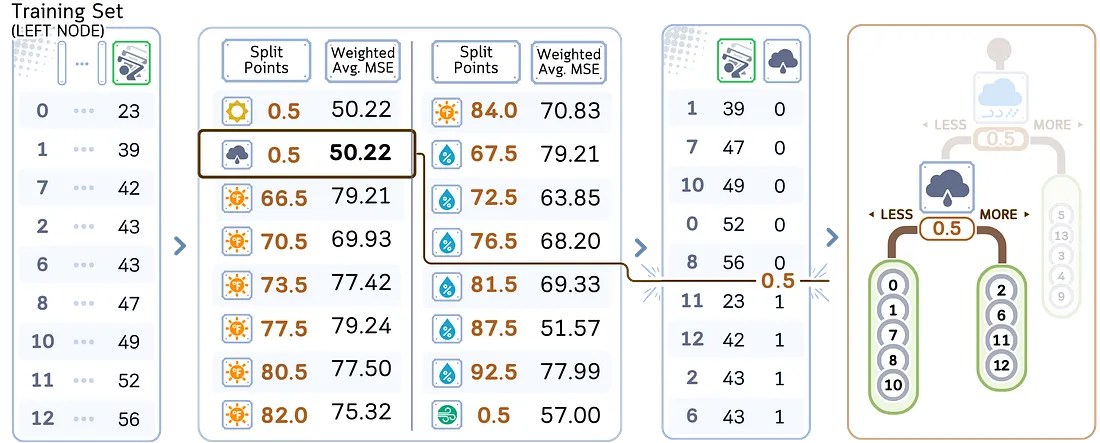

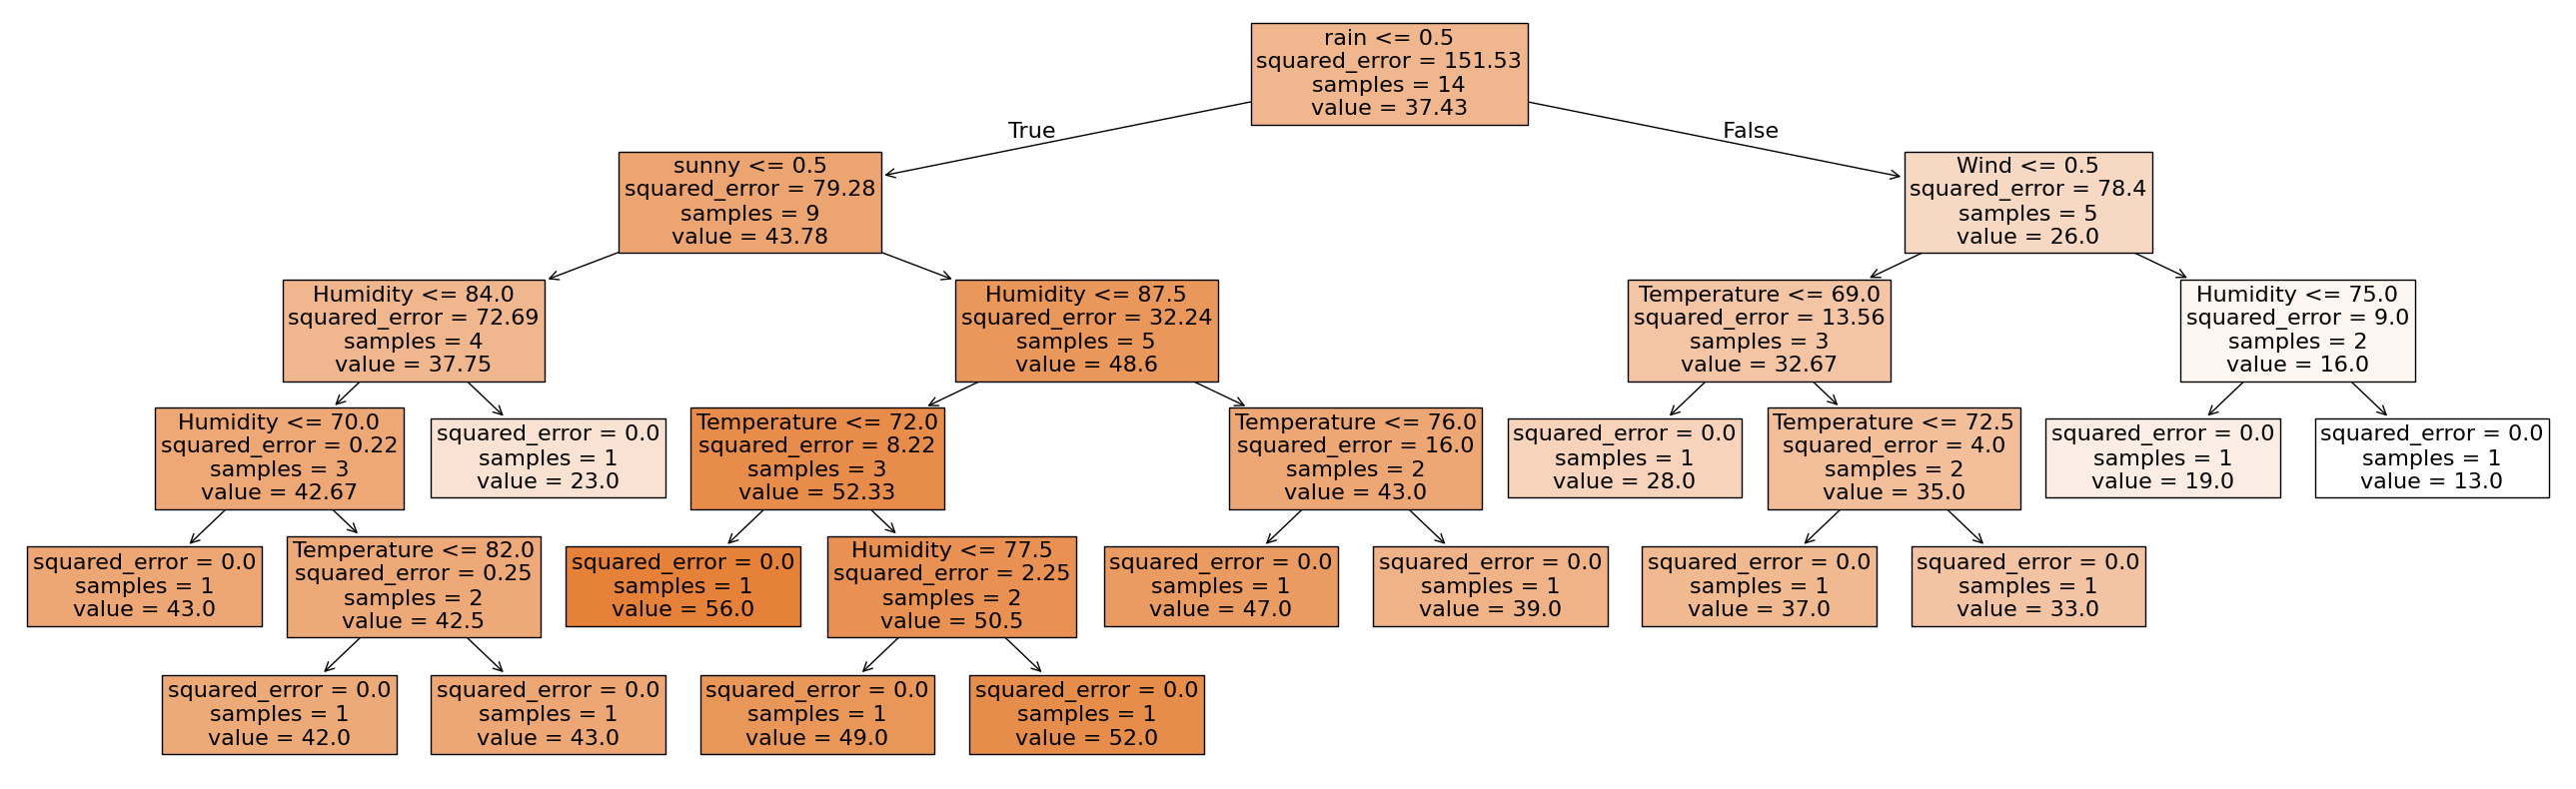

In [6]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

#train modellll
regr = DecisionTreeRegressor(random_state=42)
regr.fit(x_train, y_train)

#visualize visualize visualize
plt.figure(figsize=(26,8))
plot_tree(regr, feature_names=x.columns, filled=True, rounded = False, fontsize=16, precision=2)
plt.tight_layout()
plt.show()

In [8]:
#computing cost somplexity => to prune the tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)
eff_alpha = tree.cost_complexity_pruning_path(x_train, y_train).ccp_alphas
impurities = tree.cost_complexity_pruning_path(x_train, y_train).impurities

count_leaves = lambda tree: sum(tree.tree_.children_left[i] == tree.tree_.children_right[i] == -1 for i in range(tree.tree_.node_count))

#train trees and count leaves A alpha
leaf_counts = [count_leaves(DecisionTreeRegressor(random_state=0, ccp_alpha=alpha).fit(x_train, y_train)) for alpha in eff_alpha]
pruning_analysis = pd.DataFrame({
    'total_leaf_impurities': impurities,
    'leaf_count': leaf_counts,
    'cost_function': [f"{imp:.3f} + {leaves}α" for imp, leaves in zip(impurities, leaf_counts)],
    'effective_α': eff_alpha
})
print(pruning_analysis)

    total_leaf_impurities  leaf_count cost_function  effective_α
0                0.000000          14   0.000 + 14α     0.000000
1                0.047619          12   0.048 + 12α     0.023810
2                0.369048          11   0.369 + 11α     0.321429
3                0.940476          10   0.940 + 10α     0.571429
4                2.226190           9    2.226 + 9α     1.285714
5                3.666667           8    3.667 + 8α     1.440476
6                5.952381           7    5.952 + 7α     2.285714
7                8.285714           6    8.286 + 6α     2.333333
8               15.752381           5   15.752 + 5α     7.466667
9               55.158730           3   55.159 + 3α    19.703175
10              78.968254           2   78.968 + 2α    23.809524
11             151.530612           1  151.531 + 1α    72.562358
